In [1]:
from src.image.image_collection import Image_Collector, load_data,run_video_recognition
from src.image.object_detection.custom_network import Classifier

Using TensorFlow backend.


## 3 Training an ML classifier

In this exercise you will collaborate with four other groups to design and create a classifier for a common object of your choice. The classifier should be able to detect whether the object is in a picture.


You will go through the following basic steps of training an ML model:
1. Obtain data
1. Preprocess data
1. (Decide on a fitting model)
1. Train model
1. Analyze model

### 3.1 Obtaining data

- Find three other groups around you that you will work together with

- Agree on a common object that all of you have in your possession (e.g. a pen, glasses, a coffe cup)

- Each of the groups takes ten pictures with their object in the picture and ten pictures without the object in the picture. 
    - Take care that your image is fully within the red frame 
    - Use different backgrounds for the pictures and rotate your object
    

In [2]:
%matplotlib qt5
collector= Image_Collector()
collector.run_collector(use_binary = True)


- Replace FOLDERPATH in the following cell with the full path to the folder where you want your images to be saved
    - Make sure that the folder exists and is empty. Due to the risk of accidentally deleting an important folder, you have to do this manually.
    - On Windows, remember to double all the backslashes
    

In [3]:
save_folder = "FOLDERPATH"
save_folder = "C:\\Users\\lauri\\Documents\\test_folder"
collector.save_images(save_folder, use_augmentation=False)

### 3.2 Training the  classifier
We will now create the classifier. We will use a simple neural network consisting of one dense layer.

In [4]:
custom_network = Classifier()

Now the network is ready to start training on the data. First we will train the network for five epochs, meaning that we it will 'see' each image five times during training.

In [5]:
(x_train, y_train), (x_val, y_val) =load_data(save_folder)
custom_network.train((x_train, y_train), num_epochs =5)

Train on 6 samples, validate on 1 samples
Epoch 1/5
6/6 [==============================] - 0s 28ms/step - loss: 5.4024 - acc: 0.6667 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/5
6/6 [==============================] - 0s 3ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/5
6/6 [==============================] - 0s 4ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/5
6/6 [==============================] - 0s 3ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/5
6/6 [==============================] - 0s 3ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.1921e-07 - val_acc: 1.0000


We will now test the neural network we just trained on the validation set. 

In [6]:
custom_network.evaluate((x_val, y_val))

1/1 [==============================] - 0s 6ms/step
Accuracy on the validation set is 0.0%.


Now we will use the neural network to classify a live video feed. Evaluate how your model does with varying lighting conditions and backgrounds previously not encountered. 

In [7]:
%matplotlib qt5
custom_network.run_live(video_length =10)

### 3.3 Data augmentation
We can increase the number of training images for the classifier by using our knowledge about images. If an image is flipped or slightly rotated, it will most likely still display the same object but for our classifier look entirely different. 

This can be exploited by adding the flipped image and slightly rotated versions of the same image to the dataset dataset. In our case, this will increase the number of training images ten times while not increasing the amount of work we have to put in. This   is called *data augmentation*.

- Run the cell below to see examples of your own images in the original and augmented version. Check if the images still
    - look natural
    - are different from your original image


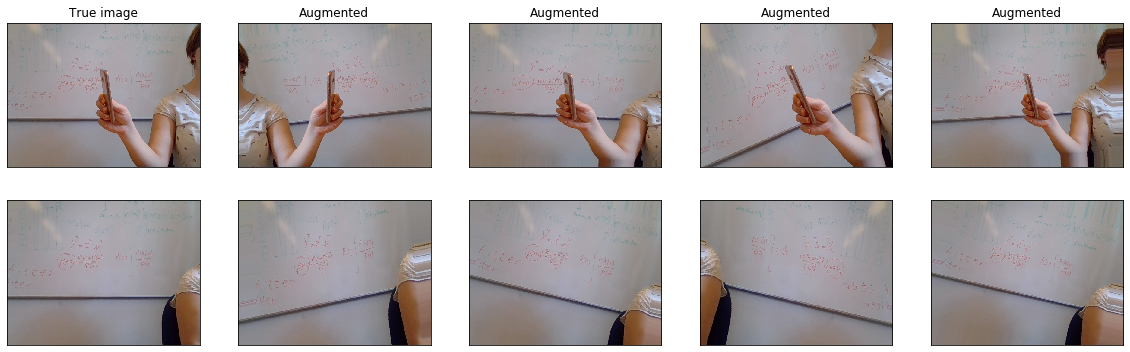

In [8]:
%matplotlib inline
collector.show_augmented()

Now repeat the training process while using augmented data. Do this by setting *use_augmentation* to True in the last cell of task *3.1* again and re-running the notebook from there.

- How does the accuracy of your network change? 
- Is the live-demo more or less accurate with data augmentation? Why is that?

### 3.4 Sharing data
Now you will collaborate with the other groups.

- Exchange your object with one of the other groups. Compare the accuracy of your network on your own object vs. the other groups object by running the cells below and taking images of your own and the other object. Where is the accuracy better?




In [9]:
%matplotlib qt5
compare_pics = Image_Collector(num_pictures=5)
compare_pics.run_collector()

Object label: Yes
Object label: no


____________________________________________________________________________________________________
Object Yes
Picture 0:  False
Picture 1:  False
Picture 2:  False
Picture 3:  False
Picture 4:  False
____________________________________________________________________________________________________
Object no
Picture 0:  False
Picture 1:  False
Picture 2:  False
Picture 3:  False
Picture 4:  False


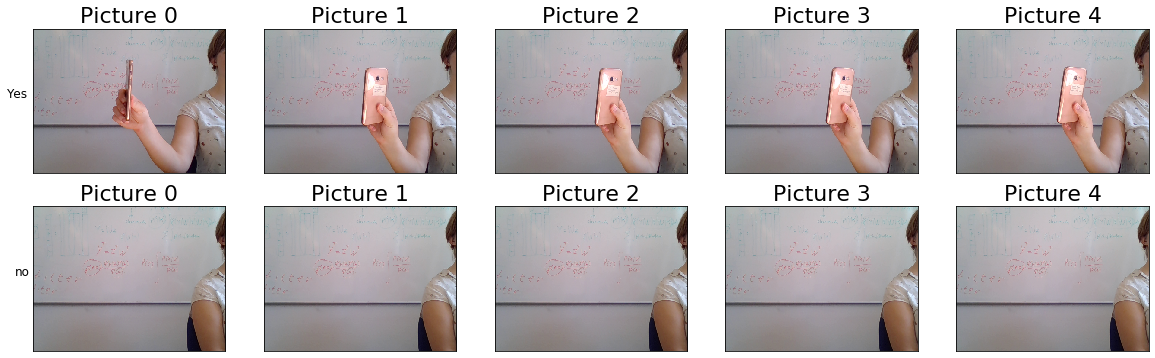

In [10]:
%matplotlib inline
compare_pics.show_images(net = custom_network.model)

To improve the accuracy of your classifier, you will share your data among groups. All of you upload your data in TODO and download all of the data into your image folder. Repeat the training process from *3.2 Training the  classifier*.
- How does the accuracy and robustness of your classifier change?